# Primera sesión práctica de Ciencia de Datos

### Preparación de la fuente de datos y librerias

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("../datos/Calidad_Del_Aire_En_Colombia_(Promedio_Anual).csv")

### 1. Introducción

##### 1. Presentación
**¿Qué factores influyen en la cantidad de veces que el contaminante atmosférico supere el nivel maximo permisible vigente?**

##### 2. Contexto

**El contaminante atmosférico** es cualquier sustancia, ya sea solido, liquido o gaseosó que entre en la atmosfera del planeta y que puede afectar la salud de las personas y el medio ambiente, estos son provocados en su mayoria por actividades que realiza el ser humano, por lo que es importante estudiar y analizar que factores tienen mayor peso a la hora de exceder el limite establecido vigente. Según el diferente compuesto su limite puede variar, algunos ejemplos son: para el PM10 de 30 µg/m³ (anual) y para el PM2.5 de 15 µg/m³ (anual) y muchos otros, pero en estos datos tomaremos en cuenta el número total de veces en que el contaminante atmosférico ha superado el nivel máximo permisible vigente establecido para el respectivo tiempo de exposición durante el año de medición.

##### 3. Relación entre el problema y la base de datos

Para este problema se usó el conjunto de datos "Calidad Del Aire En Colombia (Promedio Anual)" proporcionado por Datos Abiertos de la página datos.gov.co. Esta recopila información relacionadas con la ubicacíon y variables ambientales que servirán para encontrar que causa ese exceso del limite de contaminante atmosférico.

# 2. Descripción de la base de datos

daremos un pequeño vistazo a la base de datos.

In [127]:
data.head()

,ID Estacion,Autoridad Ambiental,Estación,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,...,Fechas/horas del máximo,Mínimo,Fechas/horas del mínimo,Días de excedencias,Código del Departamento,Nombre del Departamento,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion
0,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,1,"2,011",256.8,...,29/11/2011 1:00,1.3,29/11/2011 7:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
1,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,deg,24,"2,011",257.4,...,16/11/2011 0:00,99.7,8/11/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
2,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,PLiquida,mm,1,"2,011",4,...,20/12/2011 2:00,1.5,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
3,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,1,"2,011",645.9,...,12/09/2011 10:00,641.6,27/10/2011 17:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)
4,"9,020",AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,mmHg,24,"2,011",645.9,...,20/10/2011 0:00,644,27/10/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.443986 6.378517)


Observar el numero de datos y variables

In [128]:
# Número de registros y variables
print(f"Número de muestras: {data.shape[0]}")
print(f"Número de características: {data.shape[1]}")

Número de muestras: 28732
Número de características: 28


Contar cuantos datos numericos y categoricos hay en el dataset

In [129]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(data.dtypes.value_counts())
print("Encontramos 9 variables numericas y 19 catagóricas")


Tipos de datos por variable:
object     19
float64     5
int64       4
Name: count, dtype: int64
Encontramos 9 variables numericas y 19 catagóricas


In [130]:
#Clasificacion de variables

#Obtenemos solos los datos clasificados como "object", es decir, categoricas y convertimos esa columnas a una lista
categoricas = data.select_dtypes(include=["object"]).columns.tolist()

#Obtenemos solos los datos clasificados como "int64" y "float64", es decir, numericas y convertimos esa columnas a una lista
numericas = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

🔹 Variables categóricas:
- ID Estacion
- Autoridad Ambiental
- Estación
- Variable
- Unidades
- Año
- Promedio
- Suma
- No. de datos
- Mediana
- Percentil 98
- Máximo
- Fechas/horas del máximo
- Mínimo
- Fechas/horas del mínimo
- Nombre del Departamento
- Nombre del Municipio
- Tipo de Estación
- Ubicacion


In [131]:
print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))


🔸 Variables numéricas:
- Latitud
- Longitud
- Tiempo de exposición (horas)
- Representatividad Temporal
- Excedencias limite actual
- Porcentaje excedencias limite actual
- Días de excedencias
- Código del Departamento
- Código del Municipio


In [132]:
# Descripción general
print("\nDescripción de variables numéricas:")
print(data.describe())


Descripción de variables numéricas:
            Latitud      Longitud  Tiempo de exposición (horas)  \
count  28732.000000  28732.000000                  28732.000000   
mean       6.104342    -74.658257                     13.325143   
std        2.147278      1.133178                     11.183057   
min        1.216489    -77.283628                      1.000000   
25%        4.631767    -75.581111                      1.000000   
50%        6.059036    -74.222547                     24.000000   
75%        6.462500    -74.030417                     24.000000   
max       12.230000    -70.743889                     24.000000   

       Representatividad Temporal  Excedencias limite actual  \
count                28584.000000               28732.000000   
mean                    66.134131                  26.825491   
std                     33.027271                 146.753106   
min                      0.000000                   0.000000   
25%                     38.000000      

# 3. Análisis inicial de las variables

In [133]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = data.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante


Conteo de valores faltantes por variable:
Representatividad Temporal    148
Código del Municipio            4
Tipo de Estación                2
dtype: int64


In [134]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(data.nunique().sort_values(ascending=False)[0:26])



Conteo de valores únicos por variable:
Suma                                    14463
Fechas/horas del mínimo                 10200
Fechas/horas del máximo                  9695
Máximo                                   4214
No. de datos                             3821
Percentil 98                             3592
Promedio                                 2823
Mediana                                  2652
Mínimo                                   1532
Porcentaje excedencias limite actual     1059
Estación                                  637
Excedencias limite actual                 608
Ubicacion                                 606
Latitud                                   599
Longitud                                  596
ID Estacion                               501
Nombre del Municipio                      301
Días de excedencias                       256
Código del Municipio                      186
Representatividad Temporal                107
Nombre del Departamento                 

In [135]:
print(data.nunique().sort_values(ascending=False)[26:])

Tiempo de exposición (horas)    4
Tipo de Estación                2
dtype: int64


In [136]:
# Variables más importantes (yo hice selección manual)
variables_clave = ["Fechas/horas del mínimo", "Latitud", "Fechas/horas del máximo", "Máximo", "Percentil 98", "Promedio", "Mediana", "Mínimo", "Estación", "Excedencias limite actual", "Ubicacion", "Nombre del Municipio", "Autoridad Ambiental", "Año", "Variable"]
print("\nVista rápida de variables clave:")
print(data[variables_clave].head())


Vista rápida de variables clave:
                             Fechas/horas del mínimo   Latitud  \
0                                    29/11/2011 7:00  6.378517   
1                                     8/11/2011 0:00  6.378517   
2  07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...  6.378517   
3                                   27/10/2011 17:00  6.378517   
4                                    27/10/2011 0:00  6.378517   

  Fechas/horas del máximo Máximo Percentil 98 Promedio Mediana Mínimo  \
0         29/11/2011 1:00  359.5        350.8    256.8   244.2    1.3   
1         16/11/2011 0:00  336.8        304.2    257.4   257.9   99.7   
2         20/12/2011 2:00     23         12.8        4     2.8    1.5   
3        12/09/2011 10:00  649.8        648.1    645.9   646.1  641.6   
4         20/10/2011 0:00  647.9        647.2    645.9   645.9    644   

             Estación  Excedencias limite actual                    Ubicacion  \
0  I.E. COL. COLOMBIA                          0 

In [137]:
# Vista rápida de las variables clave
print("\nEstadísticas descriptivas de variables clave:")
print(data[variables_clave].describe())


Estadísticas descriptivas de variables clave:
            Latitud  Excedencias limite actual
count  28732.000000               28732.000000
mean       6.104342                  26.825491
std        2.147278                 146.753106
min        1.216489                   0.000000
25%        4.631767                   0.000000
50%        6.059036                   0.000000
75%        6.462500                   0.000000
max       12.230000                3292.000000


# 4. Visualizaciones exploratorias básicas

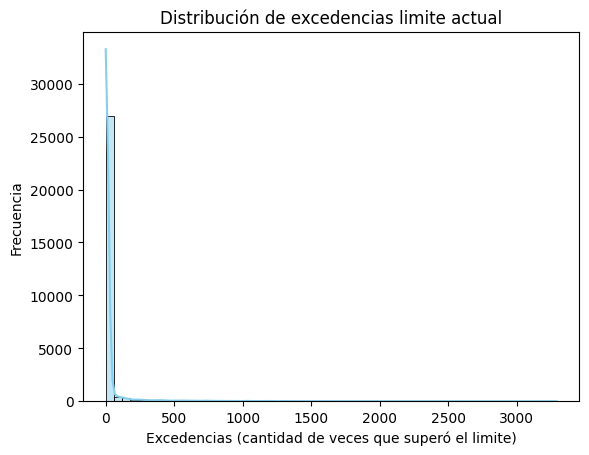

In [138]:
# Histograma
sns.histplot(data['Excedencias limite actual'], bins=55, kde=True, color='skyblue')
plt.title("Distribución de excedencias limite actual")
plt.xlabel("Excedencias (cantidad de veces que superó el limite)")
plt.ylabel("Frecuencia")
plt.show()

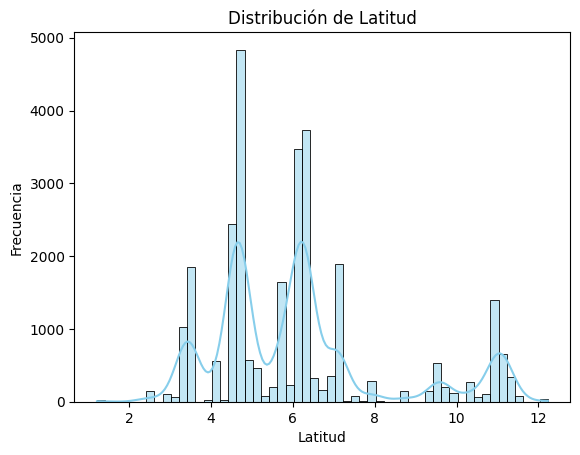

In [139]:
sns.histplot(data['Latitud'], bins=55, kde=True, color='skyblue')
plt.title("Distribución de Latitud")
plt.xlabel("Latitud")
plt.ylabel("Frecuencia")
plt.show()

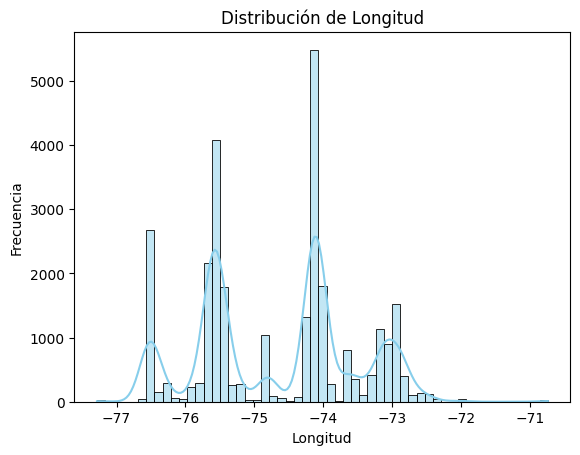

In [140]:
sns.histplot(data['Longitud'], bins=55, kde=True, color='skyblue')
plt.title("Distribución de Longitud")
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.show()

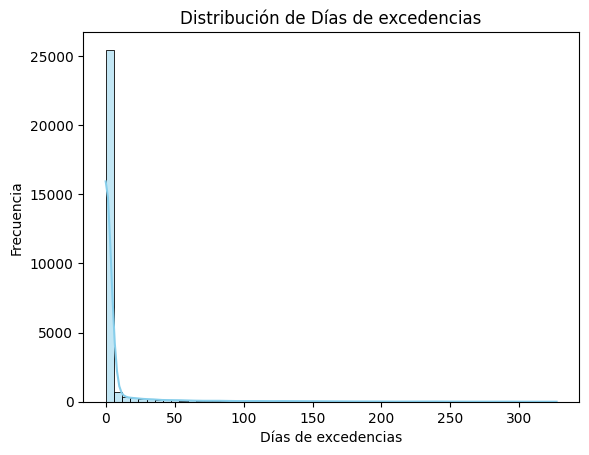

In [141]:
sns.histplot(data['Días de excedencias'], bins=55, kde=True, color='skyblue')
plt.title("Distribución de Días de excedencias")
plt.xlabel("Días de excedencias")
plt.ylabel("Frecuencia")
plt.show()

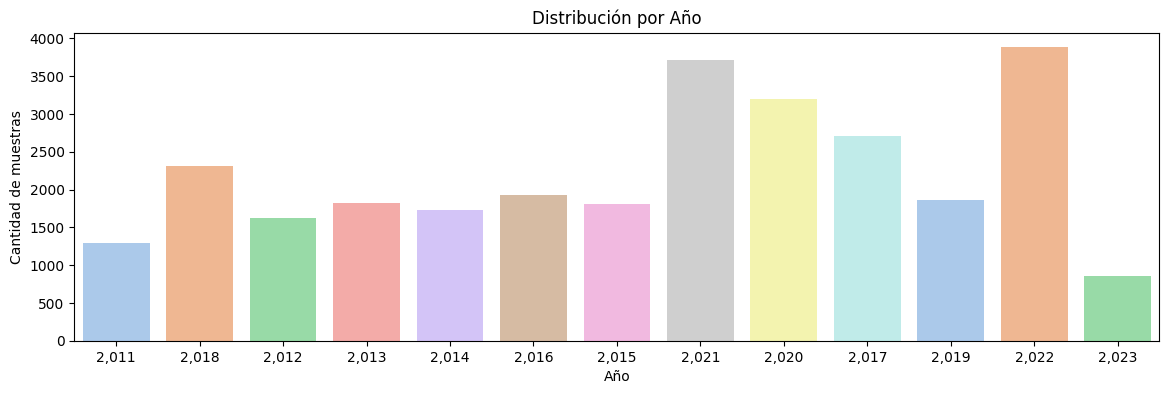

In [142]:
# Gráfico de barras de Años
plt.figure(figsize=(14, 4))
sns.countplot(x='Año', data=data, hue='Año', palette='pastel',legend=False)
plt.title("Distribución por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de muestras")
plt.show()

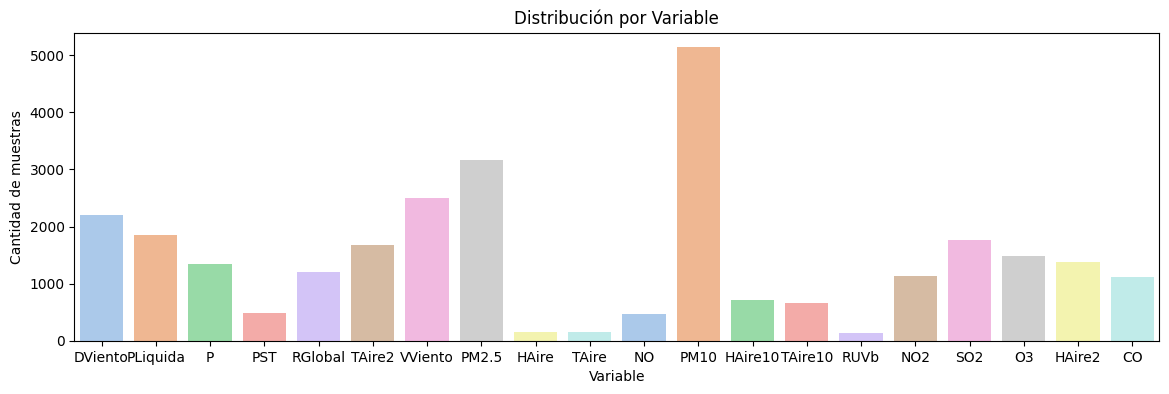

In [143]:
# Gráfico de barras
plt.figure(figsize=(14, 4))
sns.countplot(x='Variable', data=data, hue='Variable', palette='pastel',legend=False)
plt.title("Distribución por Variable")
plt.xlabel("Variable")
plt.ylabel("Cantidad de muestras")
plt.show()

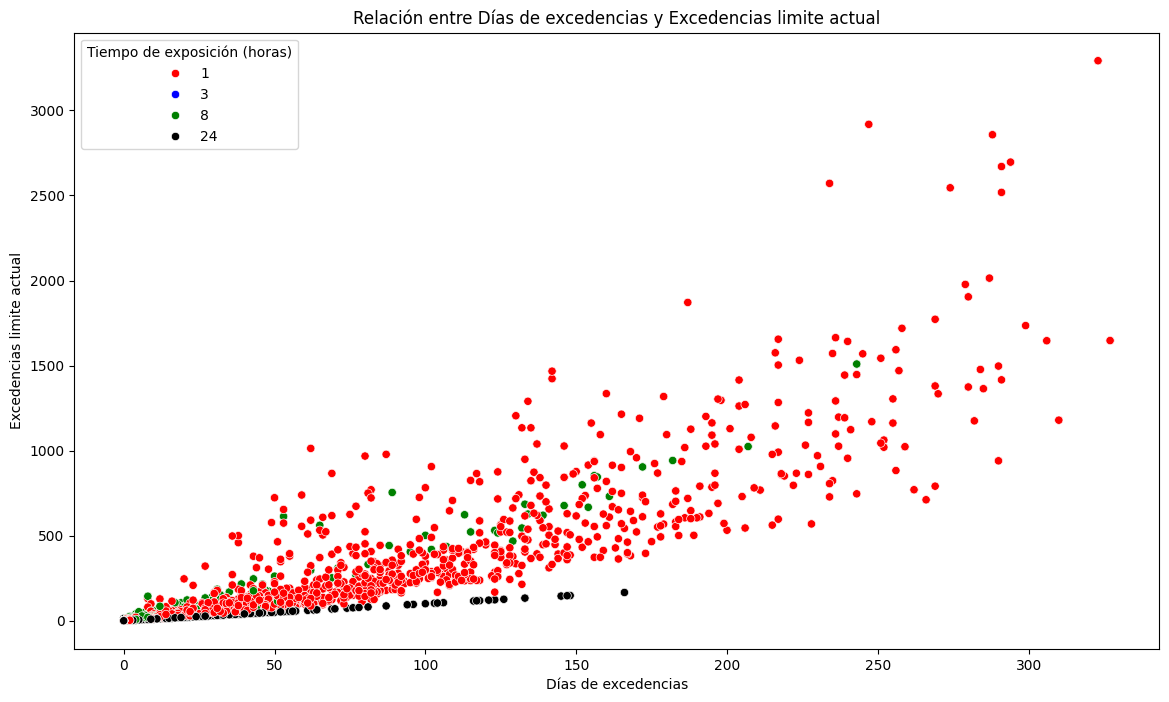

In [144]:
# Gráfico de dispersión

plt.figure(figsize=(14, 8))
sns.scatterplot(x='Días de excedencias', y='Excedencias limite actual', hue='Tiempo de exposición (horas)', data=data, palette=["red","blue", "green", "black"])
plt.title("Relación entre Días de excedencias y Excedencias limite actual")
plt.xlabel("Días de excedencias")
plt.ylabel("Excedencias limite actual")
plt.show()

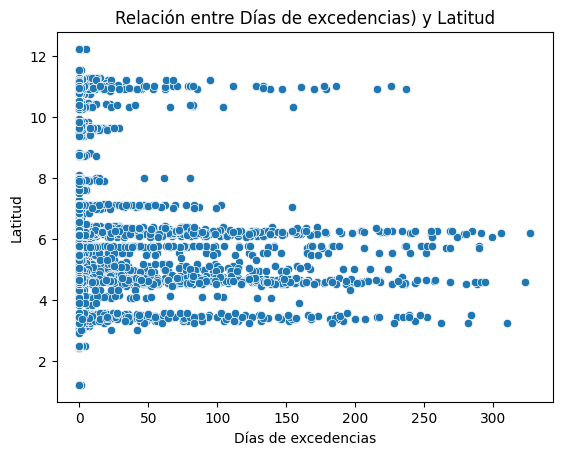

In [145]:
# Gráfico de dispersión
sns.scatterplot(x='Días de excedencias', y='Latitud', data=data)
plt.title("Relación entre Días de excedencias) y Latitud")
plt.xlabel("Días de excedencias")
plt.ylabel("Latitud")
plt.show()

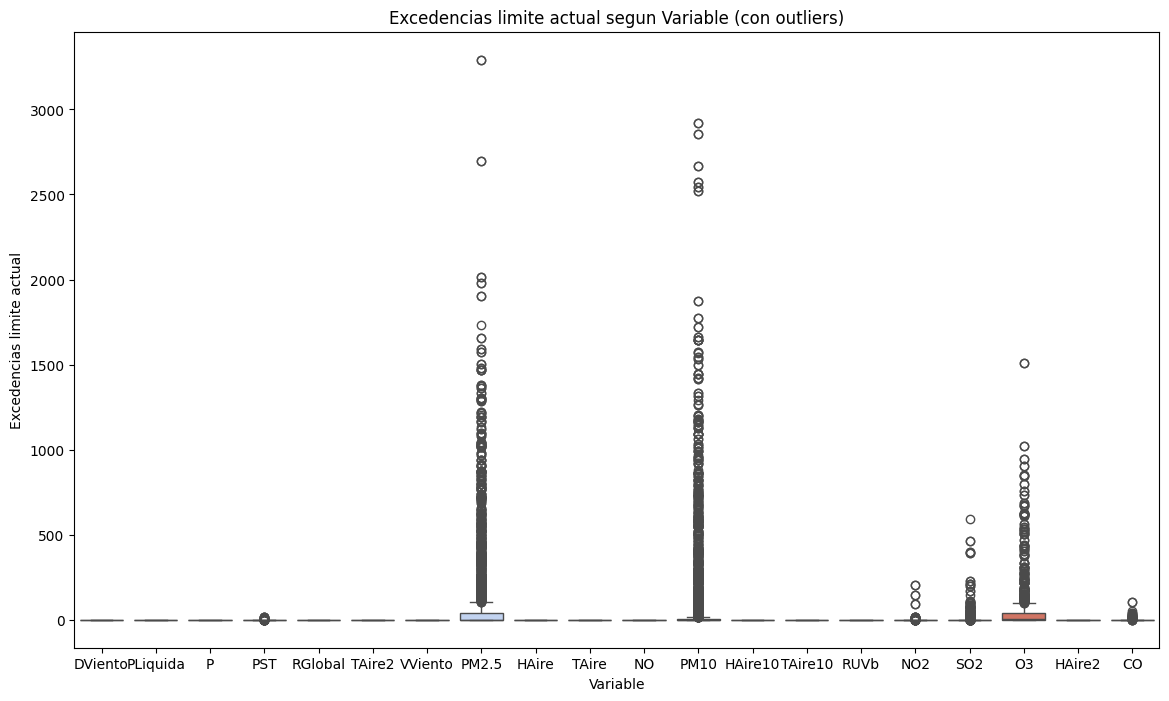

In [146]:
plt.figure(figsize=(14,8))

sns.boxplot(x='Variable', y='Excedencias limite actual',hue='Variable', data=data, palette='coolwarm')
plt.title("Excedencias limite actual segun Variable (con outliers)")
plt.xlabel("Variable")
plt.ylabel("Excedencias limite actual")
plt.show()

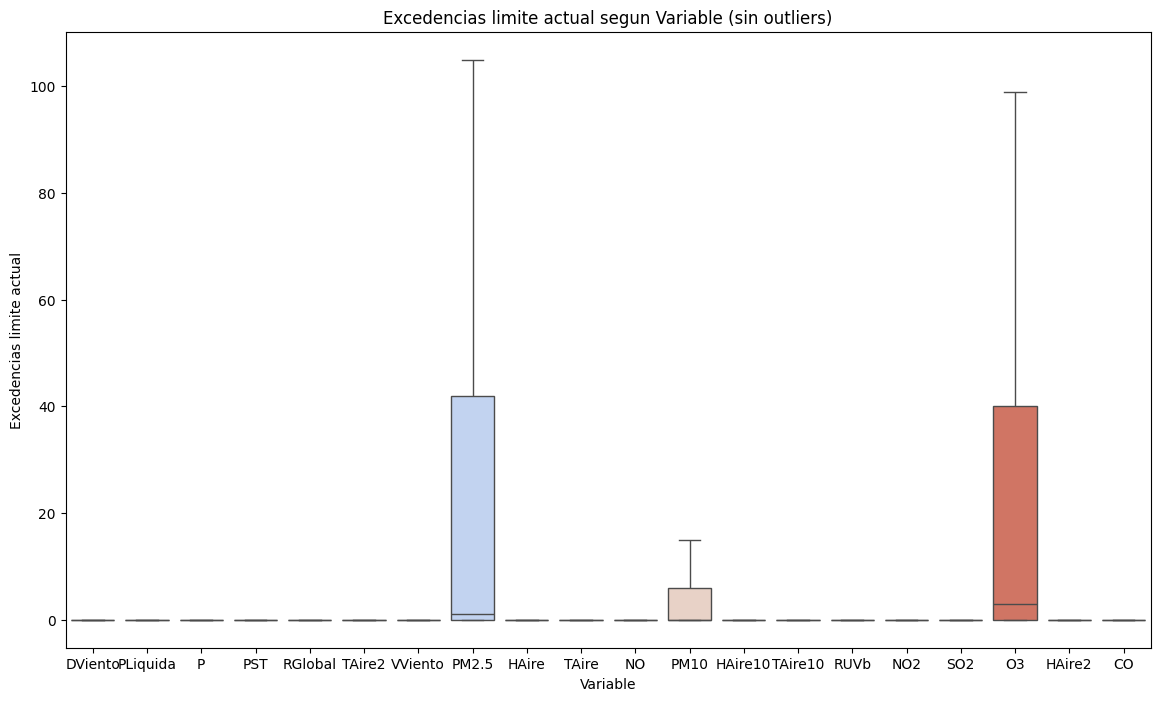

In [147]:
plt.figure(figsize=(14,8))

sns.boxplot(x='Variable', y='Excedencias limite actual',hue='Variable',showfliers=False, data=data, palette='coolwarm')
plt.title("Excedencias limite actual segun Variable (sin outliers)")
plt.xlabel("Variable")
plt.ylabel("Excedencias limite actual")
plt.show()

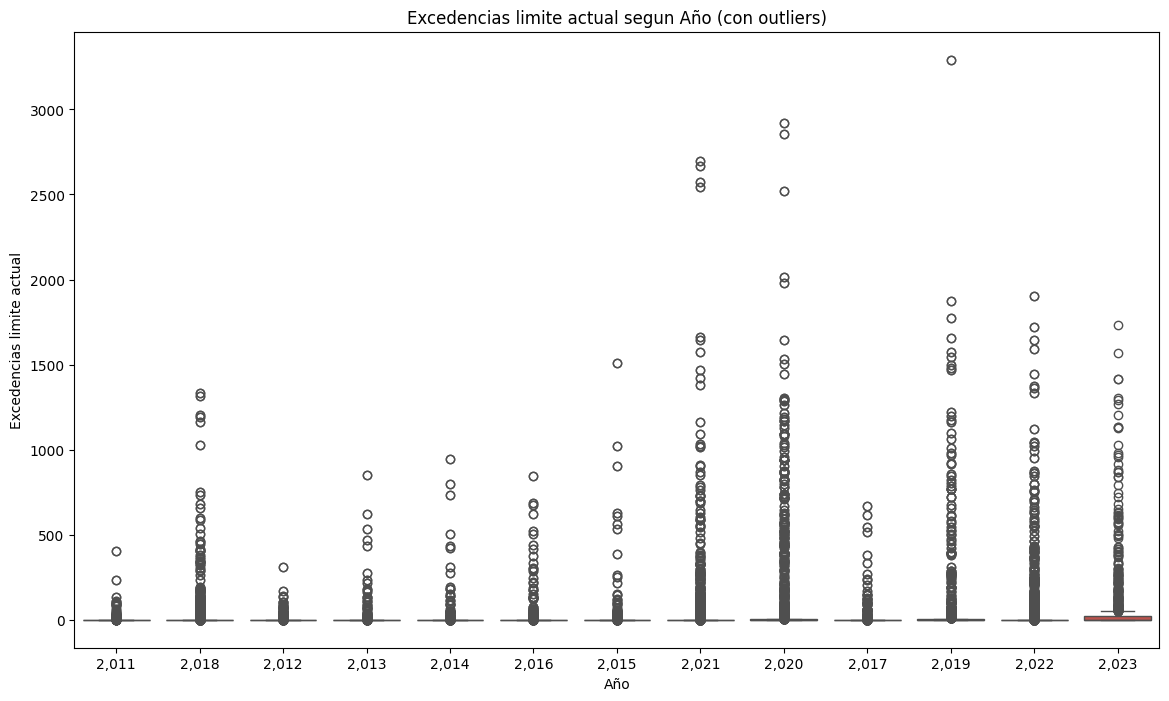

In [148]:
plt.figure(figsize=(14,8))

sns.boxplot(x='Año', y='Excedencias limite actual',hue='Año', data=data, palette='coolwarm')
plt.title("Excedencias limite actual segun Año (con outliers)")
plt.xlabel("Año")
plt.ylabel("Excedencias limite actual")
plt.show()

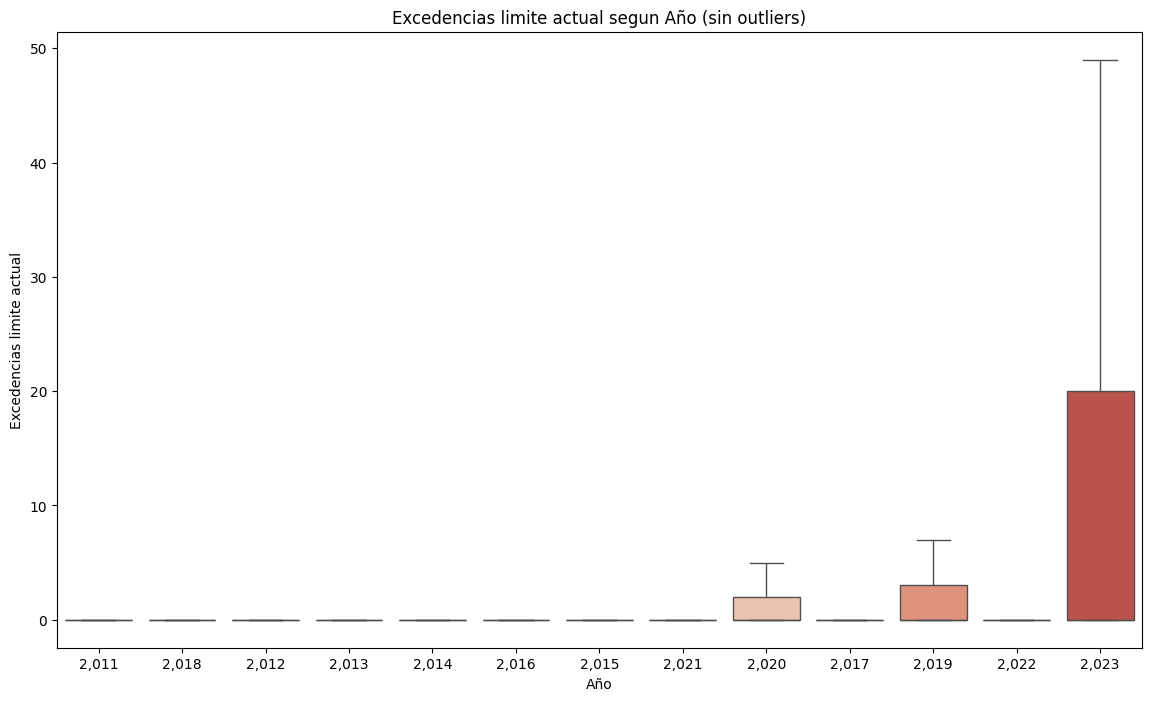

In [149]:
plt.figure(figsize=(14,8))

sns.boxplot(x='Año', y='Excedencias limite actual',hue='Año', data=data, showfliers=False,palette='coolwarm')
plt.title("Excedencias limite actual segun Año (sin outliers)")
plt.xlabel("Año")
plt.ylabel("Excedencias limite actual")
plt.show()

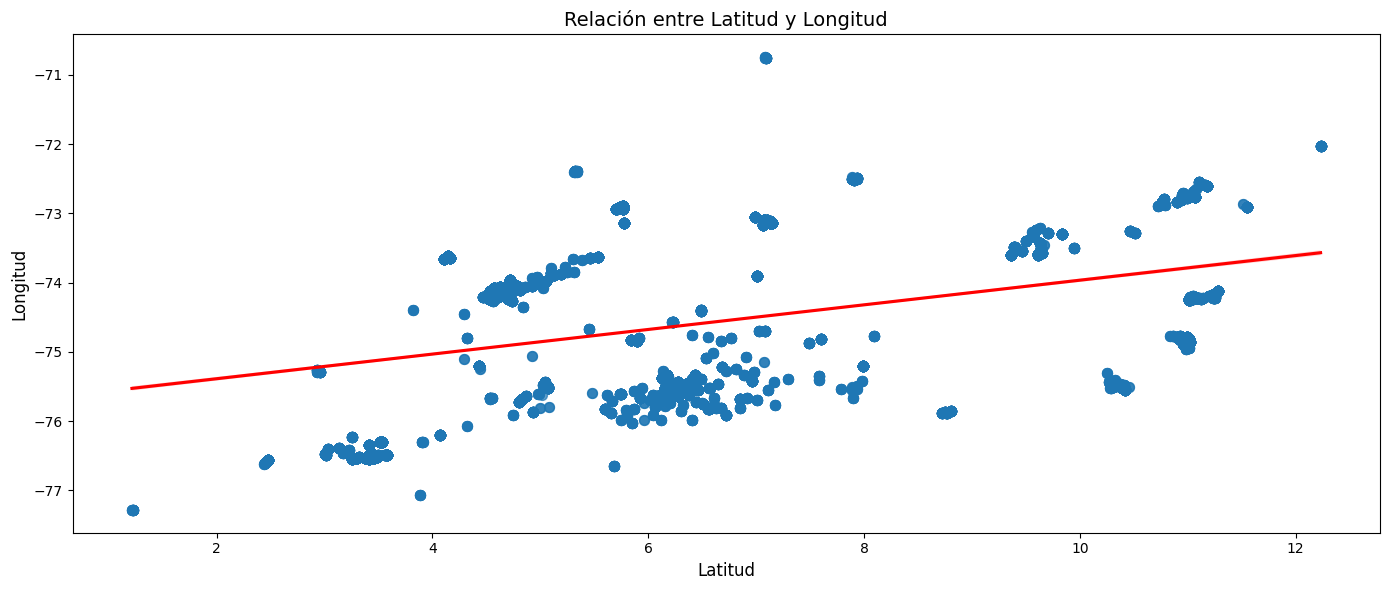

In [150]:
# Gráfico de dispersión con líneas de tendencia
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

sns.regplot(x='Latitud', y='Longitud', data=data, ax=ax,
            scatter_kws={'s': 50, 'alpha': 0.7},
            line_kws={'color': 'red'})
ax.set_title('Relación entre Latitud y Longitud', fontsize=14)
ax.set_xlabel('Latitud', fontsize=12)
ax.set_ylabel('Longitud', fontsize=12)

plt.tight_layout()
plt.show()

**¿Qué tendencias o patrones básicos se observan?**
- El umbral de establecido de contaminante atmosférico es raramente superado
- La toma de datos se ubica principalmente en cierta región del país
- Se encuentran más datos en los ultimos años que en los primeros
- El numero de veces que el contaminante atmosférico supera el umbral aumenta a medida que crecen los dias con excedencias
- Hay una relación positiva debil entre Latitud y Longitud

**¿Qué limitaciones tiene la base de datos?**
- Las variables han sido medidas en su mayoria en alguna region de colombia, por lo que puede estar sesgado el analisis al no poseer datos de otras areas del país
- Los años ultimos años del dataset contiene más datos que los mas antiguos, esto tambien puede generar sesgo por la gran información reciente frente a la de más tiempo atras
- Hay un desequilibrio en la cantidad de muestras de la caracteristica "Variable", puesto que hay subcategorias de esta con muchisimos menos datos que otras

**¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?**
- Probablemente el PM2.5, PM10 y O3 estén relacionados con los años 2019, 2020 y 2023, ya que estos presentan "Excedencias limite actual" mayores a cero en la media
- El contaminante atmosferico en gran parte del año no supera el umbral
- La cantidad de veces que se supera el umbral de contaminante atmosférico está fuertemente relacionado con la variable "Tiempo de exposición (horas)"


# 6. Conclusiones

- Se observa una relación positiva debil entre longitud y latitud, que podria referirse a la región en la fueron tomados los datos
- El umbral es superado en pocos años de los que se tienen registro
- Pocas variables meteorologicas y ambientales superan el maximo de contaminante atmosférico

# 7. Referencias

dataset: https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Calidad-Del-Aire-En-Colombia-Promedio-Anual-/kekd-7v7h/about_data

Suministrados por: Instituto de Hidrología, Meteorología y Estudios Ambientales

Breve descripción: Base de datos de calidad de aire la cual recopila el Instituto de Hidrología, Meteorología y Estudios Ambientales.

Explicación de PM2.5 y PM10: https://www.gob.mx/semarnat/articulos/particulas-suspendidas-pm10-y-pm2-5-danan-salud-y-medio-ambiente


Explicación de Latitud MAGNA-SIRGAS: https://geocontacto.com/2023/04/19/sistema-de-coordenadas-magna-sirgas-origen-nacional/#page-content
